In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [3]:
df=pd.read_csv("FullData.csv")

In [4]:
df.head()

Name Nationality National_Position  National_Kit  \
0  Cristiano Ronaldo    Portugal                LS           7.0   
1       Lionel Messi   Argentina                RW          10.0   
2             Neymar      Brazil                LW          10.0   
3        Luis SuÃ¡rez     Uruguay                LS           9.0   
4       Manuel Neuer     Germany                GK           1.0   

           Club Club_Position  Club_Kit Club_Joining  Contract_Expiry  Rating  \
0   Real Madrid            LW       7.0   07/01/2009           2021.0      94   
1  FC Barcelona            RW      10.0   07/01/2004           2018.0      93   
2  FC Barcelona            LW      11.0   07/01/2013           2021.0      92   
3  FC Barcelona            ST       9.0   07/11/2014           2021.0      92   
4     FC Bayern            GK       1.0   07/01/2011           2021.0      92   

      ...      Long_Shots Curve Freekick_Accuracy Penalties  Volleys  \
0     ...              90    81                76        85       88   
1     ...              88    89                90        74       85   
2     ...              77    79                84        81       83   
3     ...              86    86                84        85       88   
4     ...              16    14                11        47       11   

  GK_Positioning GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
0             14         7          15           11           11  
1             14         6          15           11            8  
2             15         9          15            9           11  
3             33        27          31           25           37  
4             91        89          95           90           89  

[5 rows x 53 columns]

In [5]:
del df['National_Kit']

In [6]:
df.head()

Name Nationality National_Position          Club  \
0  Cristiano Ronaldo    Portugal                LS   Real Madrid   
1       Lionel Messi   Argentina                RW  FC Barcelona   
2             Neymar      Brazil                LW  FC Barcelona   
3        Luis SuÃ¡rez     Uruguay                LS  FC Barcelona   
4       Manuel Neuer     Germany                GK     FC Bayern   

  Club_Position  Club_Kit Club_Joining  Contract_Expiry  Rating  Height  \
0            LW       7.0   07/01/2009           2021.0      94  185 cm   
1            RW      10.0   07/01/2004           2018.0      93  170 cm   
2            LW      11.0   07/01/2013           2021.0      92  174 cm   
3            ST       9.0   07/11/2014           2021.0      92  182 cm   
4            GK       1.0   07/01/2011           2021.0      92  193 cm   

      ...      Long_Shots Curve Freekick_Accuracy  Penalties Volleys  \
0     ...              90    81                76         85      88   
1     ...              88    89                90         74      85   
2     ...              77    79                84         81      83   
3     ...              86    86                84         85      88   
4     ...              16    14                11         47      11   

  GK_Positioning  GK_Diving  GK_Kicking  GK_Handling  GK_Reflexes  
0             14          7          15           11           11  
1             14          6          15           11            8  
2             15          9          15            9           11  
3             33         27          31           25           37  
4             91         89          95           90           89  

[5 rows x 52 columns]

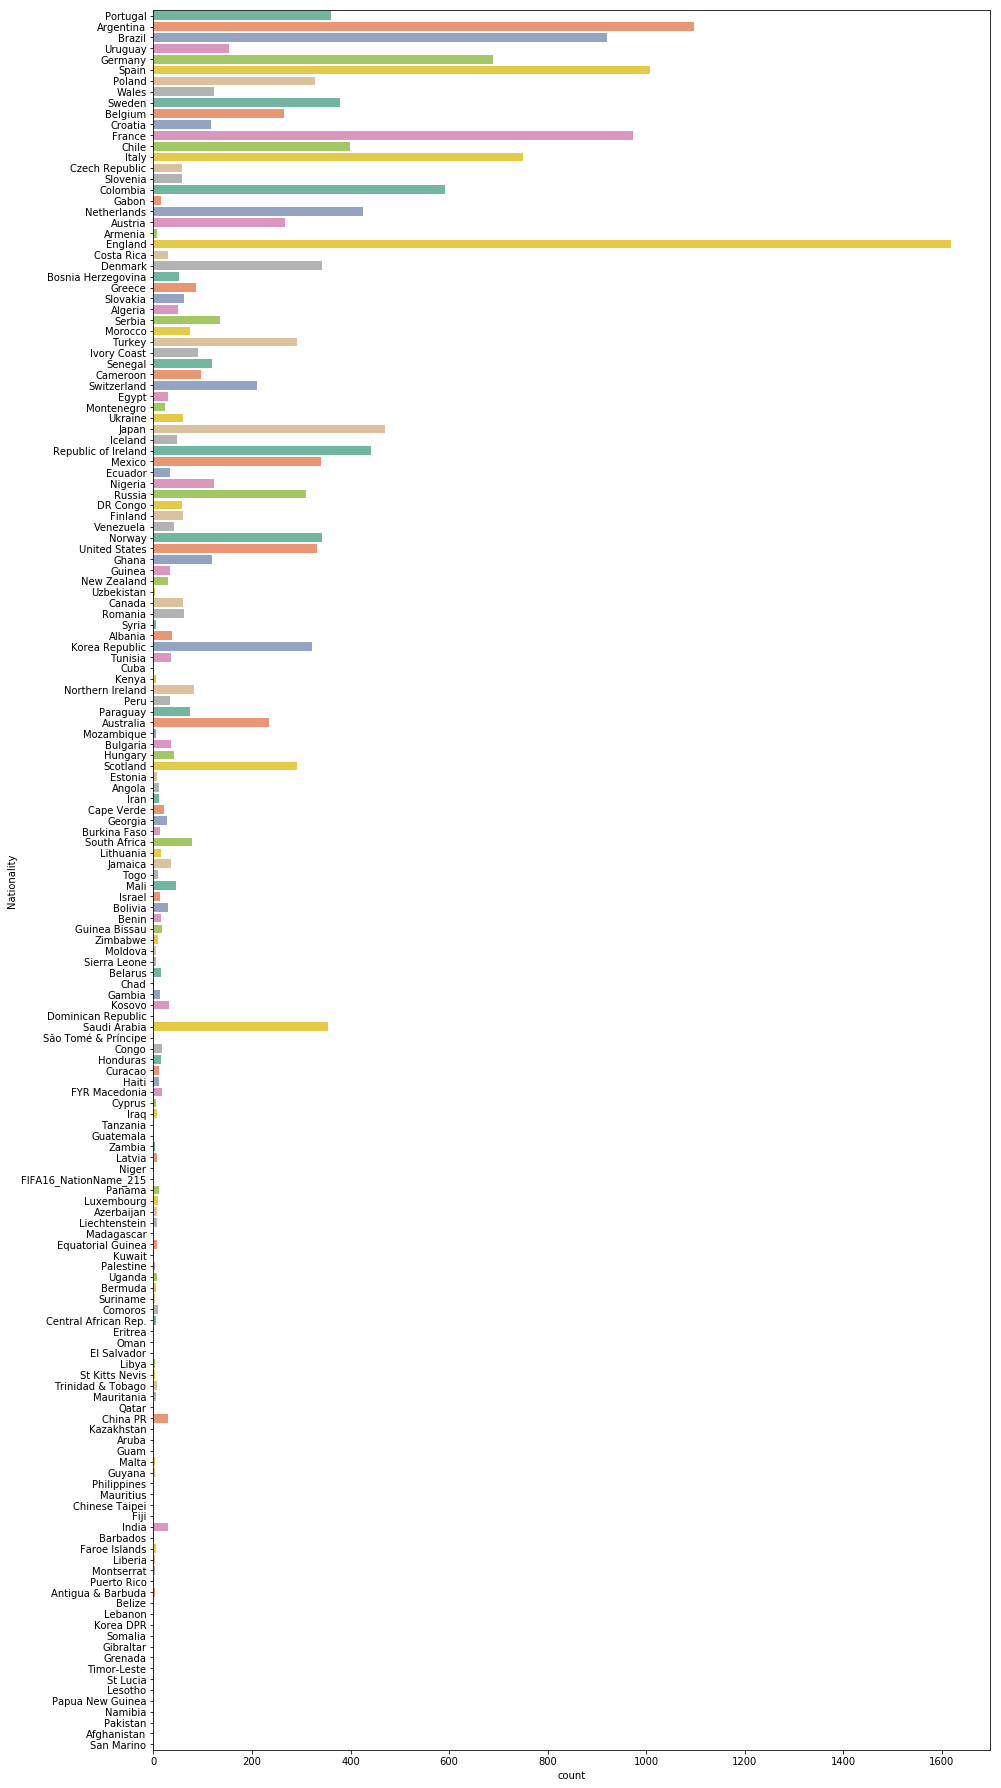

In [7]:
plt.figure(figsize=(15,32))
sns.countplot(y= df.Nationality,palette="Set2")

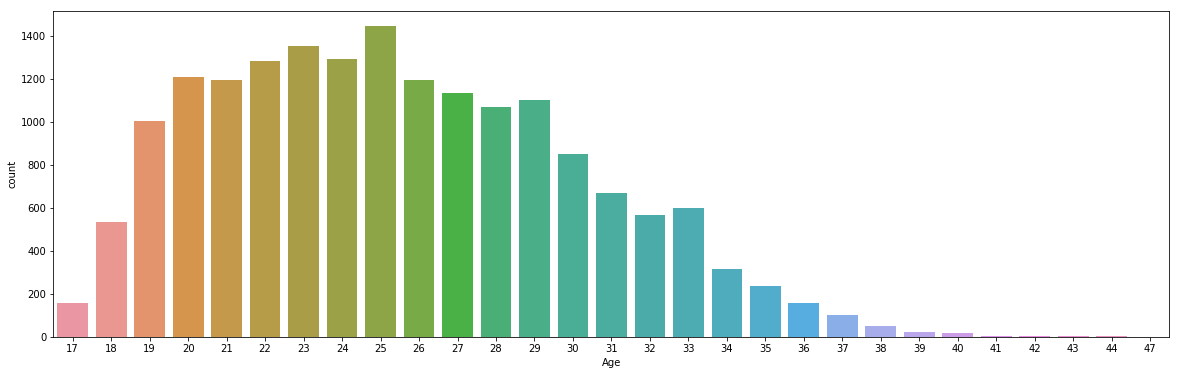

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age",data=df)

# Best Goal Keeper

In [9]:
#assignning weight 
a=0.5
b=1
c=2
d=3

In [10]:
#Goalkeeper Charactertics
df['gk_Shot_Stopper']=(b*df.Reactions+b*df.Composure+a*df.Speed+a*df.Strength+c*df.Jumping+b*df.GK_Positioning+c*df.GK_Diving+d*df.GK_Reflexes+b*df.GK_Handling)/(2*a+4*b+2*c+1*d)
df['gk_Sweeper']=(b*df.Reactions+b*df.Composure+b*df.Speed+a*df.Short_Pass+a*df.Long_Pass+b*df.Jumping+b*df.GK_Positioning+c*df.GK_Diving+d*df.GK_Reflexes+b*df.GK_Handling)/(6*b+2*a+1*c+1*d)

Text(0,0.5,u'Shot Stopping Score')

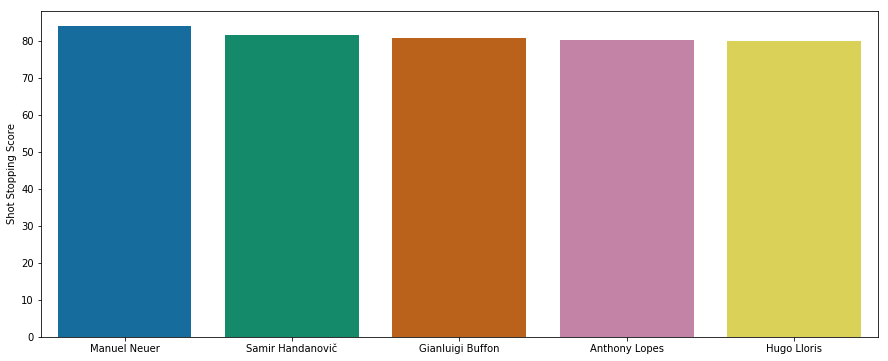

In [11]:
plt.figure(figsize=(15,6))
 
# Generate sequential data and plot
sd = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd['Name']))
y1 = np.array(list(sd['gk_Shot_Stopper']))
sns.barplot(x1, y1, palette= "colorblind")
plt.ylabel("Shot Stopping Score")

Text(0,0.5,u'Sweeping Score')

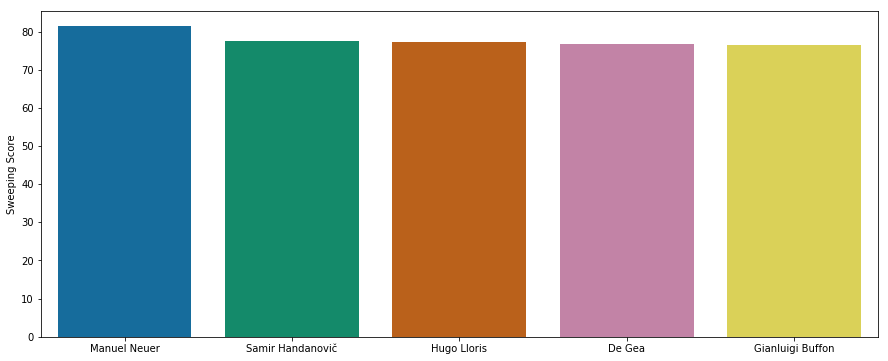

In [12]:
plt.figure(figsize=(15,6))
sd = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['gk_Sweeper']))
sns.barplot(x2, y2, palette= "colorblind")
plt.ylabel("Sweeping Score")

# After analysing best shot stopper and best swipper we get to know that manueal neuer is best goalkeeper

# Choosing best defenders

In [13]:
#Choosing defender 
df['df_centre_backs'] = ( d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.Short_Pass + b*df.Long_Pass+ c*df.Acceleration + b*df.Speed
+ d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
df['df_wb_Wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)

# Choosing Left center defender 

Text(0,0.5,u'LCB Score')

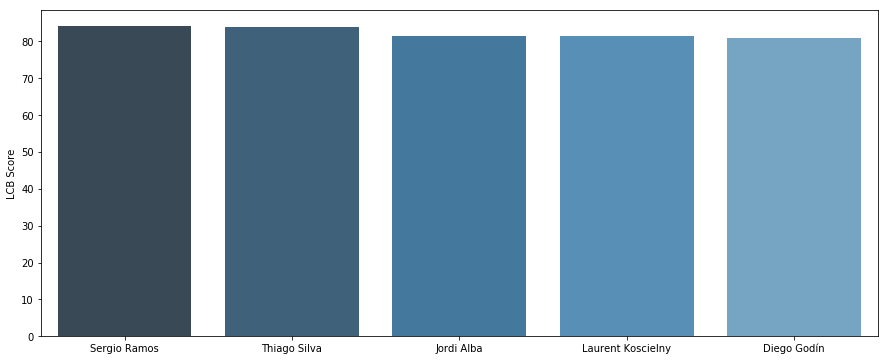

In [14]:
# Left center  defender
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")


Based on the left centre back characteristics, it can be inferred that Sergio Ramos is the Best Left Central Defender

# Choosing Right Center Defender

Text(0,0.5,u'RCB Score')

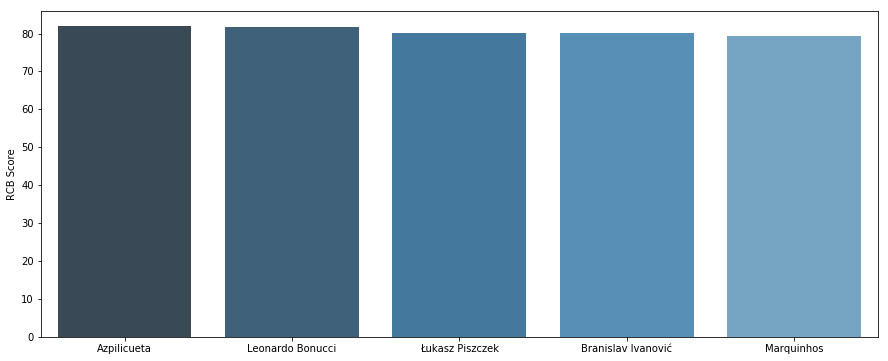

In [15]:
plt.figure(figsize=(15,6))
 
sd = df[(df['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x2 = np.array(list(sd['Name']))
y2 = np.array(list(sd['df_centre_backs']))
sns.barplot(x2, y2, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

Based on the right centre back characteristics, it can be inferred that Azpilicueta is the Best Right Central Defender. 

# Choosing left  wing back

Text(0,0.5,u'Left Back Score')

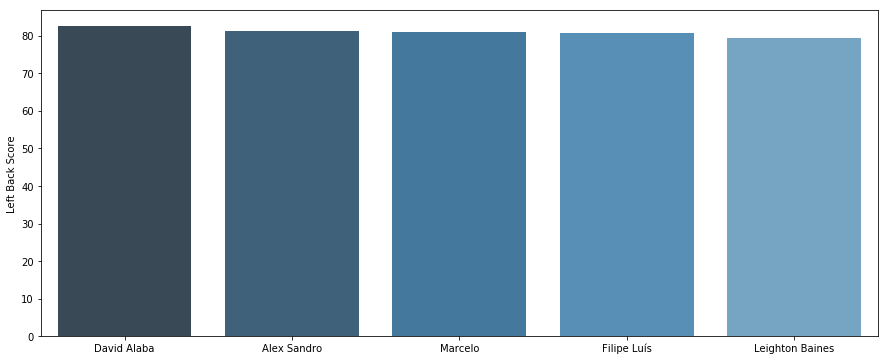

In [16]:

plt.figure(figsize=(15,6))
 
sd = df[(df['Club_Position'] == 'LWB') | (df['Club_Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd['Name']))
y4 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

# chossing right wing back

Text(0,0.5,u'Right Back Score')

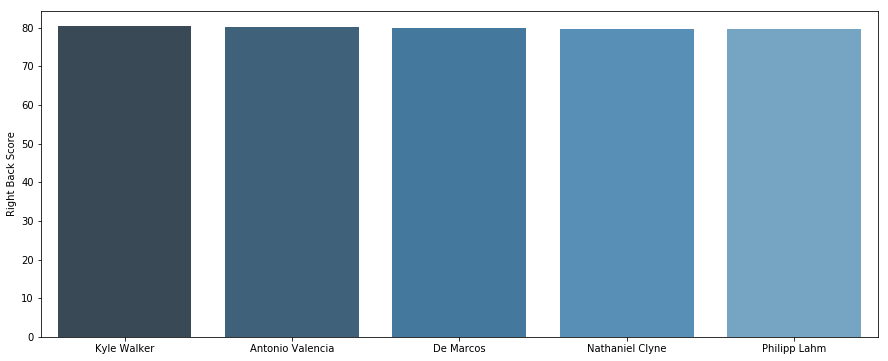

In [17]:
plt.figure(figsize=(15,6))
sd = df[(df['Club_Position'] == 'RWB') | (df['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x5 = np.array(list(sd['Name']))
y5 = np.array(list(sd['df_wb_Wing_Backs']))
sns.barplot(x5, y5, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

kyle walker is best right wing back

As per my game formation 4-3-3, I have to choose 3 midfielders. In order to find these, I’ll be analyzing the data for the below mentioned parameters:

    Playmaker: A playmaker is someone who will move the ball to the attacking 3rd from defence or midfield.

    Beast:A beast is a typical box-to-box player with loads of energy and who can boss the midfield.
    
    Controller:A controller is the person who is orchestrating your midfield engine by either sitting back or going forward based on dynamic needs.

In [18]:
#Midfielding Indices
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)

# visualisation for playmaker

Text(0,0.5,u'PlayMaker Score')

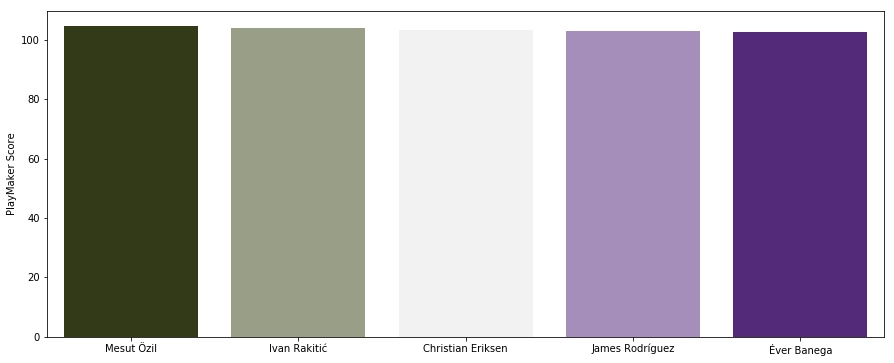

In [19]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'LAM') | (df['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(100, 280, s=85, l=25, n=5))
plt.ylabel("PlayMaker Score")

As per the above analysis, I’ll pick Mesut Ozil as the best Playmaker for W

# Visualisation for beast

Text(0,0.5,u'Beast Score')

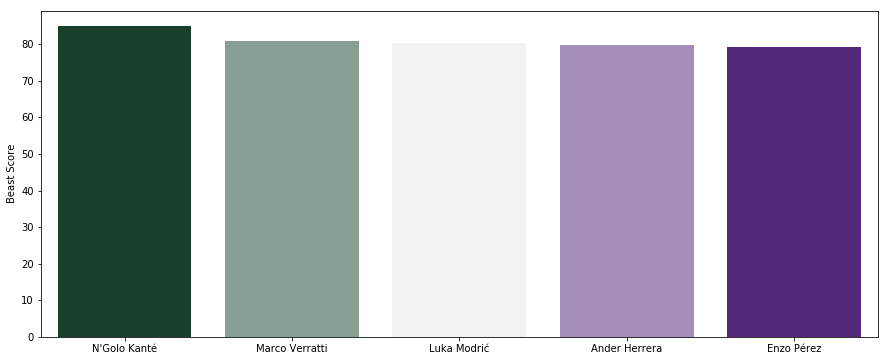

In [20]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Beast Score")

As per the above analysis, I’ll pick N’ Golo Kante as the best Beast/ Right Central Midfielder

# Visualisation for controller

Text(0,0.5,u'Controller Score')

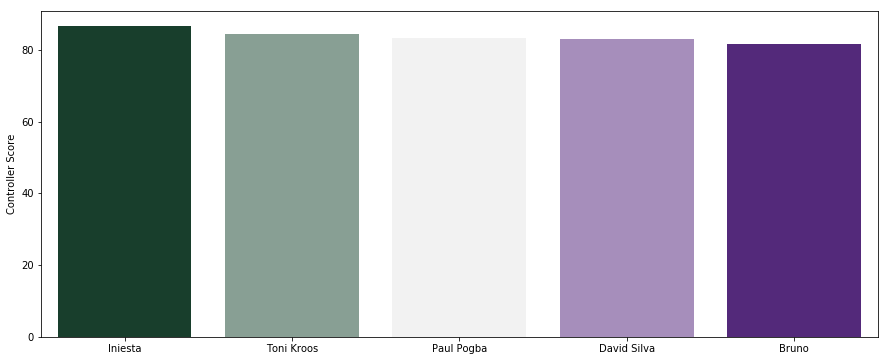

In [21]:
plt.figure(figsize=(15,6))
 
# Generate some sequential data
ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel("Controller Score")

As per the above analysis, I’ll pick Iniesta as the best controller/ Left Central Midfielder.

In order to find the best attacker, I’ll be analyzing the below mentioned parameters:
    
Attacking Left Wing: He is a player, attacking from the left flank.

Attacking Right Wing: He is a player, attacking from the right flank.

Striker: He is a player attacking from the center.

In [22]:
#Attackers
df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

# Visualisation for left wing attacker

Text(0,0.5,u'Left Wing')

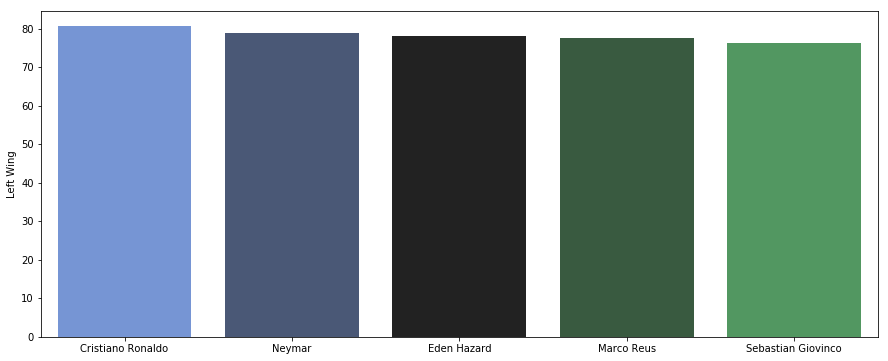

In [23]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

It’s quite evident from the above plot that Ronaldo is the best Left Wing Attacker for World Cup 2018.

# Visualisation for right Wing attacker

Text(0,0.5,u'Right Wing')

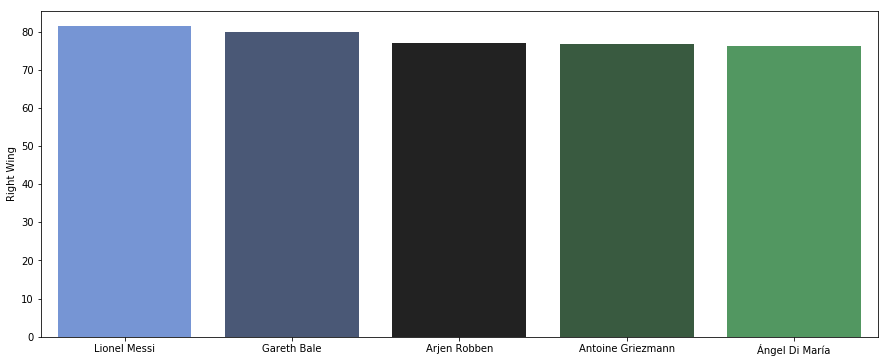

In [24]:
plt.figure(figsize=(15,6))
 
ss = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['att_right_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

As per the above analysis, I’ll pick Lionel Messi as the right wing attacker for World Cup 2018.

# Visualisation fro striker

Text(0,0.5,u'Striker')

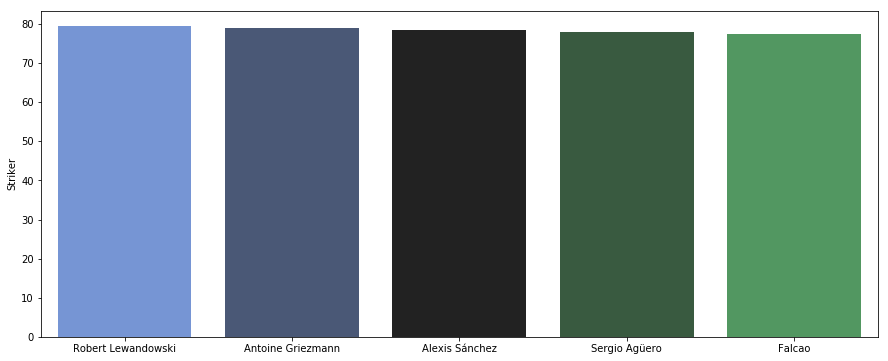

In [25]:
plt.figure(figsize=(15,6))
ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")

As per the above analysis, the best striker for World Cup 2018 would be Robert Lewandowski.


# End of the best players in fifa